In [1]:
import boto3
from io import StringIO
import pandas as pd

# Set your AWS region
region_name = 'ap-south-1'  # Replace with your actual region

# Set your S3 URI (full path to the object including the bucket name)
s3_uri = 's3://mys3destination-bucket/destination/uploads/insurance.csv'

# Parse the S3 URI to extract bucket name and key
bucket, key = s3_uri.replace('s3://', '').split('/', 1)

# Create an S3 client without specifying access key and secret access key
s3 = boto3.client('s3', region_name=region_name)

try:
    # Read the filtered data from S3
    response = s3.get_object(Bucket=bucket, Key=key)
    content = response['Body'].read().decode('utf-8')

    # Parse CSV data using pandas
    df = pd.read_csv(StringIO(content))

    # Display the first few rows of the DataFrame
    print(df.head())

except Exception as e:
    print(f"Error loading filtered data from S3: {str(e)}")

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


   age     sex   bmi  children smoker     region    charges
0   19  female  27.9         0    yes  southwest  16884.924
1   23    male  34.4         0     no  southwest   1826.843
2   19    male  24.6         1     no  southwest   1837.237
3   56    male  40.3         0     no  southwest  10602.385
4   30    male  35.3         0    yes  southwest  36837.467


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [3]:
# Explore the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       325 non-null    int64  
 1   sex       325 non-null    object 
 2   bmi       325 non-null    float64
 3   children  325 non-null    int64  
 4   smoker    325 non-null    object 
 5   region    325 non-null    object 
 6   charges   325 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.9+ KB
None
              age         bmi    children       charges
count  325.000000  325.000000  325.000000    325.000000
mean    39.455385   30.596615    1.141538  12346.937377
std     13.959886    5.691836    1.275952  11557.179101
min     19.000000   17.400000    0.000000   1241.565000
25%     27.000000   26.900000    0.000000   4751.070000
50%     39.000000   30.300000    1.000000   8798.593000
75%     51.000000   34.600000    2.000000  13462.520000
max     64.000000   47.600000

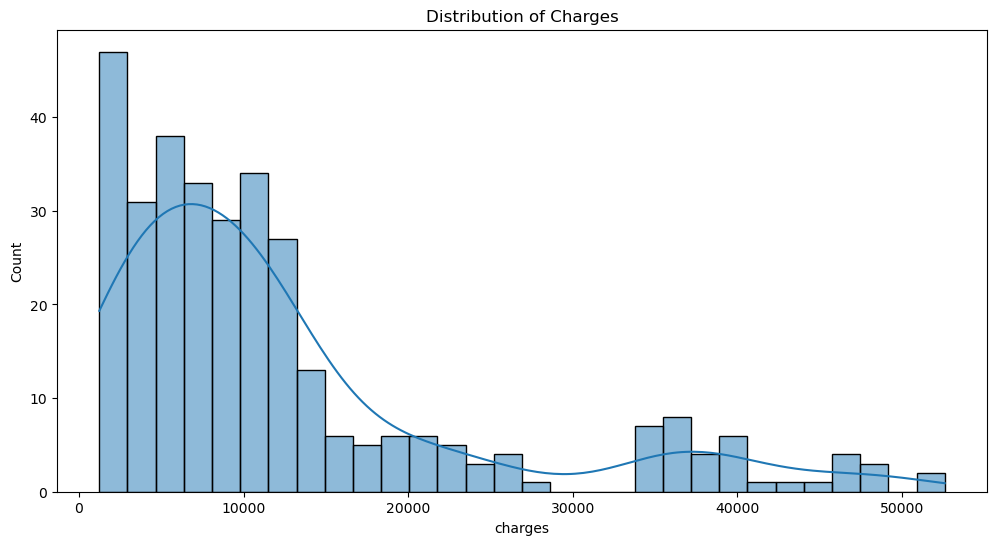

In [4]:
# Visualize the distribution of the target variable 'charges'
plt.figure(figsize=(12, 6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.show()


In [6]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])



In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,0,16884.92400
1,23,1,34.4,0,0,0,1826.84300
2,19,1,24.6,1,0,0,1837.23700
3,56,1,40.3,0,0,0,10602.38500
4,30,1,35.3,0,1,0,36837.46700
...,...,...,...,...,...,...,...
320,19,0,20.6,0,0,0,1731.67700
321,52,1,38.6,2,0,0,10325.20600
322,23,0,33.4,0,0,0,10795.93733
323,52,0,44.7,3,0,0,11411.68500


In [8]:
# Split the data into features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Perform Polynomial Regression
degree = 2  # You can adjust the degree based on your needs
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [11]:
# Create a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


LinearRegression()

In [12]:
# Make predictions on the test set
y_pred_poly = poly_model.predict(X_test_poly)


In [13]:
# Evaluate the polynomial model
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Mean Squared Error (Polynomial Regression): {mse_poly}")

Mean Squared Error (Polynomial Regression): 25548096.95673111


In [15]:
from sklearn.metrics import r2_score
# Calculate R-squared value
r2 = r2_score(y_test, y_pred_poly)
print(f"R-squared Value: {r2}")

R-squared Value: 0.8501076293810373


In [1]:
!pip install scikit-learn

In [5]:
import scipy

In [6]:
scipy.__version__

'1.11.4'